In [3]:
# Traffic Sign Detector Model

# features -> images
# target -> 0 to 43

import os
import cv2

# Loading the Data

In [4]:
# location of your dataset

loc = "C:/Users/91808/Downloads/SPK IIIT/datasets/Traffic signs Dataset/"

1. go inside the folders
2. get names of each images
3. one by one read the image
4. store the image in a collection

In [5]:
features = []
target= []
for i in list(range(0,43)):
    collection_images_names = os.listdir(loc + str(i))
    for j in collection_images_names:
        img = cv2.imread(loc + str(i)+ "/" + j )
        features.append(img)
        target.append(i)
    print("Loading data in Folder" ,i)

Loading data in Folder 0
Loading data in Folder 1
Loading data in Folder 2
Loading data in Folder 3
Loading data in Folder 4
Loading data in Folder 5
Loading data in Folder 6
Loading data in Folder 7
Loading data in Folder 8
Loading data in Folder 9
Loading data in Folder 10
Loading data in Folder 11
Loading data in Folder 12
Loading data in Folder 13
Loading data in Folder 14
Loading data in Folder 15
Loading data in Folder 16
Loading data in Folder 17
Loading data in Folder 18
Loading data in Folder 19
Loading data in Folder 20
Loading data in Folder 21
Loading data in Folder 22
Loading data in Folder 23
Loading data in Folder 24
Loading data in Folder 25
Loading data in Folder 26
Loading data in Folder 27
Loading data in Folder 28
Loading data in Folder 29
Loading data in Folder 30
Loading data in Folder 31
Loading data in Folder 32
Loading data in Folder 33
Loading data in Folder 34
Loading data in Folder 35
Loading data in Folder 36
Loading data in Folder 37
Loading data in Folder

In [8]:
print(type(features))
print(type(target))

<class 'list'>
<class 'list'>


In [9]:
import numpy as np

In [10]:
features = np.array(features)
target = np.array(target)

In [14]:
print(type(features))
print(type(target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [15]:
features.shape

(34798, 32, 32, 3)

In [16]:
target.shape

(34798,)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_features,test_features,train_target,test_target= train_test_split(features,target,test_size=0.2)

#20% to test,80% to train

Preprocessing ->
1. The technique to generate new images at different angles is called image augmentation
2. Normalization - Reducing the range of pixel values by diving the pixel values by 255,just so that we have faster calculations.
3. Converting the image to black and white(grayscale)

In [19]:
def preprocessing(image):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image = image/225
    return image

In [20]:
train_features = np.array(list(map(preprocessing,train_features)))
test_features = np.array(list(map(preprocessing,test_features)))

In [21]:
train_features.shape

(27838, 32, 32)

In [22]:
train_features= train_features.reshape(27838,32,32,1)

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
dataGen = ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1)

In [26]:
dataGen.fit(train_features)

In [27]:
batches = dataGen.flow(train_features,train_target,batch_size=20)

In [28]:
len(batches)
#27838/20

1392

In [29]:
images,labels = next(batches)

# Ploting the images

In [30]:
images.shape

(20, 32, 32, 1)

In [32]:
images = images.reshape(20,32,32)

In [33]:
import matplotlib.pyplot as plt 

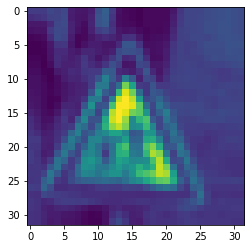

In [34]:
plt.imshow(images[0])
plt.show()

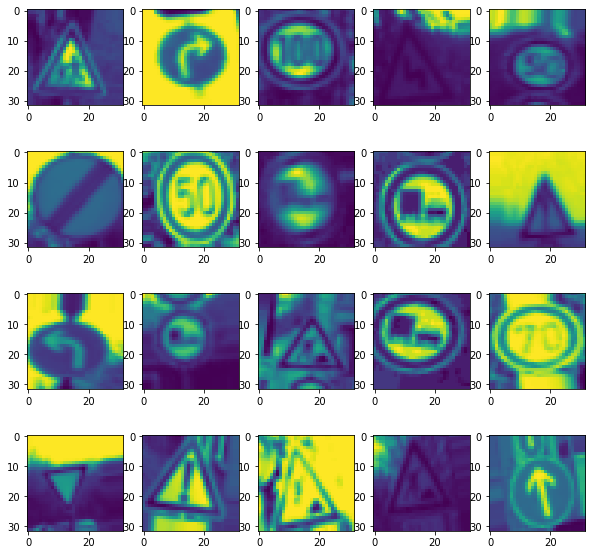

In [35]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(images[i])
plt.show()    

# Model

In [37]:
from tensorflow.keras.utils import to_categorical

In [38]:
train_target = to_categorical(train_target)

In [39]:
train_target.shape

(27838, 43)

# Architecture

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout

In [42]:
model = Sequential()
model.add(Conv2D(60,(3,3),activation="relu",input_shape=(32,32,1)))
model.add(Conv2D(60,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(30,(3,3),activation="relu"))
model.add(Conv2D(30,(3,3),activation="relu"))
model.add(Conv2D(30,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(43,activation="softmax"))

# Compilation

In [43]:
from tensorflow.keras.optimizers import Adam

In [44]:
model.compile(Adam(learning_rate= 0.001),loss="categorical_crossentropy",metrics=["accuracy"])

# Training the Model

Generating new images, and combining it with origianal images, and train on those original images

In [45]:
model.fit_generator(dataGen.flow(train_features,train_target,batch_size=20),epochs=20)

C:\Users\91808\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1392/1392 [==============================] - 266s 190ms/step - loss: 2.1512 - accuracy: 0.3929
Epoch 2/20
1392/1392 [==============================] - 285s 205ms/step - loss: 0.6998 - accuracy: 0.7841
Epoch 3/20
1392/1392 [==============================] - 226s 162ms/step - loss: 0.4383 - accuracy: 0.8650
Epoch 4/20
1392/1392 [==============================] - 197s 141ms/step - loss: 0.3390 - accuracy: 0.8938
Epoch 5/20
1392/1392 [==============================] - 212s 152ms/step - loss: 0.2735 - accuracy: 0.9162
Epoch 6/20
1392/1392 [==============================] - 197s 141ms/step - loss: 0.2381 - accuracy: 0.9278
Epoch 7/20
1392/1392 [==============================] - 182s 131ms/step - loss: 0.2155 - accuracy: 0.9335
Epoch 8/20
1392/1392 [==============================] - 183s 132ms/step - loss: 0.1911 - accuracy: 0.9429
Epoch 9/20
1392/1392 [==============================] - 197s 141ms/step - loss: 0.1755 - accuracy: 0.9472
Epoch 10/20
1392/1392 [=======================

# Saving the Model

In [46]:
address = 'C:/Users/91808/Downloads/SPK IIIT/internships and courses/python/files for traffic sign model/'

In [47]:
ModelInJson = model.to_json()
abc = open(address + 'model_traffic_sign.json', 'w')
abc.write(ModelInJson)
abc.close()

model.save_weights(address + 'model_traffic_sign_weights.h5')

# Loading the Model

In [10]:
address = 'C:/Users/91808/Downloads/SPK IIIT/internships and courses/python/files for traffic sign model/'

In [11]:
from tensorflow.keras.models import model_from_json

In [12]:
abc = open(address + 'model_traffic_sign.json','r')
loaded_data = abc.read()
loaded_model = model_from_json(loaded_data)
loaded_model.load_weights(address + 'model_traffic_sign_weights.h5')

# Testing the Model

In [13]:
import cv2

In [14]:
def preprocessing(image):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image = image/225


    return image

In [15]:
def getClassname(classNo):
    if classNo == 0:    return 'Speed limit (20km/h)'
    elif classNo == 1:    return 'Speed limit (30km/h)'
    elif classNo == 2:    return 'Speed limit (50km/h)'
    elif classNo == 3:    return 'Speed limit (60km/h)'
    elif classNo == 4:    return 'Speed limit (70km/h)'
    elif classNo == 5:    return 'Speed limit (80km/h)'
    elif classNo == 6:    return 'End of speed limit (80km/h)'
    elif classNo == 7:    return 'Speed limit (100km/h)'
    elif classNo == 8:    return 'Speed limit (120km/h)'
    elif classNo == 9:    return 'No passing '
    elif classNo == 10:    return 'No passing for vechiles over 3.5 metric tons'
    elif classNo == 11:    return 'Right-of-way at the next intersection'
    elif classNo == 12:    return 'Priority road'
    elif classNo == 13:    return 'Yield'
    elif classNo == 14:    return 'Stop'
    elif classNo == 15:    return 'No Vechicles'
    elif classNo == 16:    return 'Vechiles over 3.5 metric tons prohibited'
    elif classNo == 17:    return 'No Entry'
    elif classNo == 18:    return 'General caution'
    elif classNo == 19:    return 'Dangerous curve to the left'
    elif classNo == 20:    return 'Dangerous curve to the right'
    elif classNo == 21:    return 'Double Curve'
    elif classNo == 22:    return 'Bumpy road'
    elif classNo == 23:    return 'Slippery road'
    elif classNo == 24:    return 'Road narrows on the right'
    elif classNo == 25:    return 'Road work'
    elif classNo == 26:    return 'Traffic signals'
    elif classNo == 27:    return 'Pedestrians'
    elif classNo == 28:    return 'Children crossing'
    elif classNo == 29:    return 'Bicycle crossing'
    elif classNo == 30:    return 'Beware of ice/snow'
    elif classNo == 31:    return 'Wild animals crossing'
    elif classNo == 32:    return 'End of all speed and passing limits'
    elif classNo == 33:    return 'Turn right ahead'
    elif classNo == 34:    return 'Turn left ahead'
    elif classNo == 35:    return 'Ahead Only'
    elif classNo == 36:    return 'Go straight or right)'
    elif classNo == 37:    return 'Go straight or left'
    elif classNo == 38:    return 'Keep right'
    elif classNo == 39:    return 'Keep left'
    elif classNo == 40:    return 'Roundabout mandatory'
    elif classNo == 41:    return 'End of no passing'
    elif classNo == 42:    return 'End of no passing by vechiles over 3.5 metric tons'
    



In [16]:
#location of haarcascade_frontalface_default file

place = "C:/Users/91808/Downloads/SPK IIIT/internships and courses/python/"

In [18]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

cv2.ocl.setUseOpenCL(False)


cap = cv2.VideoCapture(0)
cap.set(3,640)
cap.set(4,480)
cap.set(10,180)

while True:
    message,image = cap.read()
    imagearr = np.asarray(image)
    imagearr = cv2.resize(image,(32,32))
    imagearr = preprocessing(imagearr)
    imagearr = imagearr.reshape(1,32,32,1)
    predictions= loaded_model.predict(imagearr)
    NeuronIndex = loaded_model.predict_classes(imagearr)
    cv2.putText(image,"Class: ",(20,35),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,225),2)
    cv2.putText(image,"Probablity: ",(20,75),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,225),2)
    ProbablityValue = np.amax(predictions)
    if ProbablityValue > 0.75:
        cv2.putText(image,getClassname(NeuronIndex),(120,35),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,225),2)
        cv2.putText(image,str(int(ProbablityValue*100)) + "%",(200,75),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,225),2)
    cv2.imshow("Model Predcition",image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()        